<a href="https://colab.research.google.com/github/shreyas-desai-stevens/KDDM-project/blob/main/KDDM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [225]:
import  sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [226]:
df = pd.read_csv('/content/drive/MyDrive/KDDM_Project/adult.csv',names = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num', 'Marital-Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native_country', 'Target'])

In [227]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [228]:
df.shape

(32561, 15)

In [229]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-num      int64
Marital-Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain       int64
Capital-loss       int64
Hours-per-week     int64
Native_country    object
Target            object
dtype: object

Dropping because it is same as label encoding the education column

In [230]:
df.drop(['Education-num'],axis=1,inplace=True)

In [231]:
for column in df.columns:
  print(f"{column} : {df[column].nunique()} ")
  print(f"Unique Values:{df[column].unique()}")
  print()

Age : 73 
Unique Values:[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Workclass : 9 
Unique Values:[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt : 21648 
Unique Values:[ 77516  83311 215646 ...  34066  84661 257302]

Education : 16 
Unique Values:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Marital-Status : 7 
Unique Values:[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation : 15 
Unique Values:[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Cra

In [232]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [233]:
df.replace('?', np.nan, inplace=True)

In [234]:
null_values = df.isnull().sum()
print(null_values)

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Marital-Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital-gain         0
Capital-loss         0
Hours-per-week       0
Native_country     583
Target               0
dtype: int64


In [235]:
df_dropped = df.copy(deep=True)

In [236]:
label_encoder = LabelEncoder()
for column in df.columns:
      df[column] = label_encoder.fit_transform(df[column])
      print("Class Labels:", label_encoder.classes_)
      print("Encoded Values:", df[column])

Class Labels: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 90]
Encoded Values: 0        22
1        33
2        21
3        36
4        11
         ..
32556    10
32557    23
32558    41
32559     5
32560    35
Name: Age, Length: 32561, dtype: int64
Class Labels: ['Federal-gov' 'Local-gov' 'Never-worked' 'Private' 'Self-emp-inc'
 'Self-emp-not-inc' 'State-gov' 'Without-pay' nan]
Encoded Values: 0        6
1        5
2        3
3        3
4        3
        ..
32556    3
32557    3
32558    3
32559    3
32560    4
Name: Workclass, Length: 32561, dtype: int64
Class Labels: [  12285   13769   14878 ... 1366120 1455435 1484705]
Encoded Values: 0         2671
1         2926
2        14086
3        15336
4        19355
         ...  
32556    16528
32557     8080
32558     7883
32559    12881
32560    17825
Name: fnlwgt

In [237]:
df.head()

,Age,Workclass,fnlwgt,Education,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Target
0,22,6,2671,9,4,0,1,4,1,25,0,39,38,0
1,33,5,2926,9,2,3,0,4,1,0,0,12,38,0
2,21,3,14086,11,0,5,1,4,1,0,0,39,38,0
3,36,3,15336,1,2,5,0,2,1,0,0,39,38,0
4,11,3,19355,9,2,9,5,2,0,0,0,39,4,0


In [238]:
X = df.drop(['Target'],axis=1)
y = df['Target']

In [239]:
df.dtypes

Age               int64
Workclass         int64
fnlwgt            int64
Education         int64
Marital-Status    int64
Occupation        int64
Relationship      int64
Race              int64
Sex               int64
Capital-gain      int64
Capital-loss      int64
Hours-per-week    int64
Native_country    int64
Target            int64
dtype: object

[0.1504445  0.04392545 0.15892974 0.09425473 0.07482918 0.08416034
 0.08284668 0.01503175 0.02669572 0.11782147 0.03727886 0.09355685
 0.02022474]


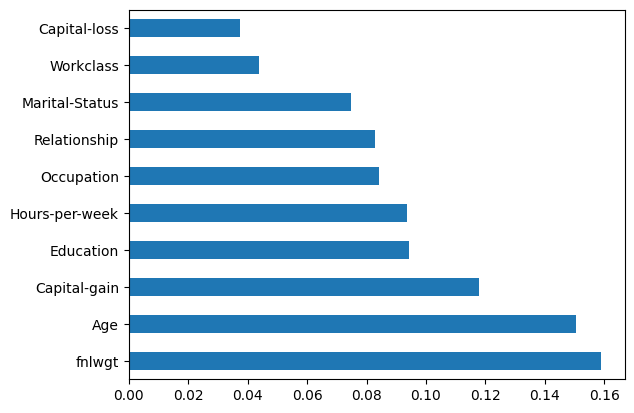

In [240]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feature_importances=pd.Series(model.feature_importances_,index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()

In [241]:
df_dropped.dropna(inplace=True)

In [242]:
df_dropped.shape

(30162, 14)

In [243]:
label_encoder = LabelEncoder()
for column in df_dropped.columns:
      df_dropped[column] = label_encoder.fit_transform(df_dropped[column])

In [244]:
df_dropped.describe()

,Age,Workclass,fnlwgt,Education,Marital-Status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native_country,Target
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,21.435482,2.199324,9825.221504,10.333764,2.580134,5.959850,1.418341,3.678602,0.675685,6.552450,2.072641,39.871527,36.382567,0.248922
std,13.125355,0.953925,5671.017927,3.812292,1.498016,4.029566,1.601338,0.834709,0.468126,23.284819,10.028470,11.771826,6.105372,0.432396
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,2.000000,5025.250000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,39.000000,38.000000,0.000000
50%,20.000000,2.000000,9689.500000,11.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,39.000000,38.000000,0.000000
75%,30.000000,2.000000,14520.750000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,44.000000,38.000000,0.000000
max,71.000000,6.000000,20262.000000,15.000000,6.000000,13.000000,5.000000,4.000000,1.000000,117.000000,89.000000,93.000000,40.000000,1.000000


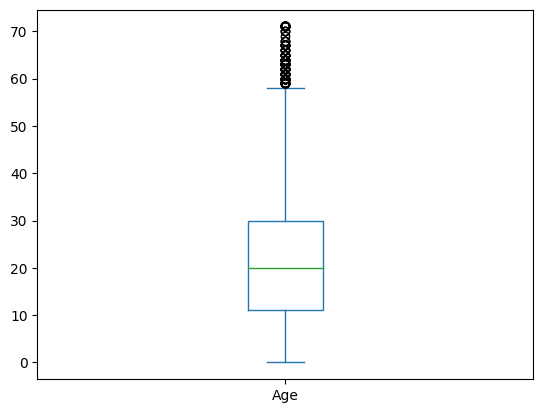

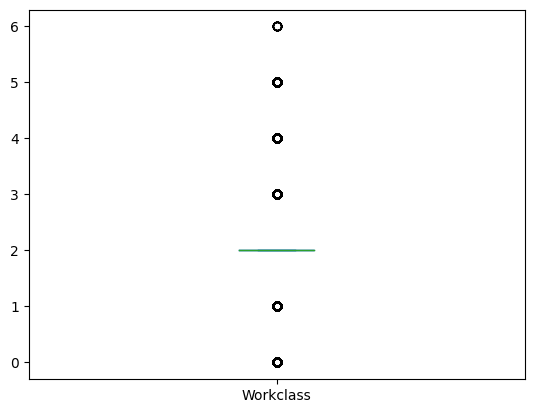

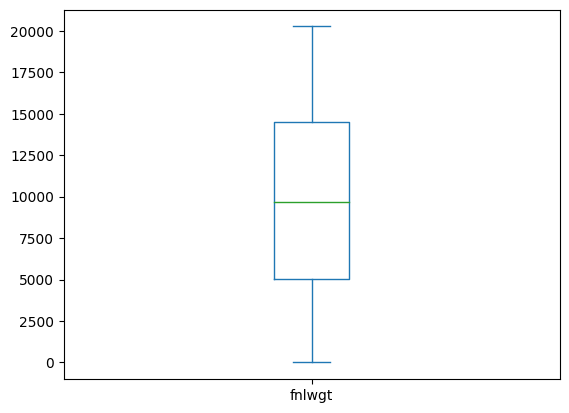

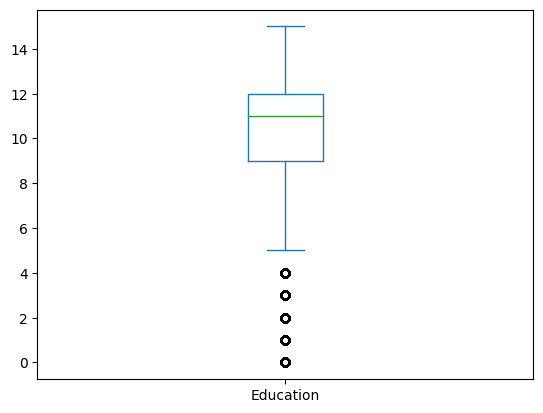

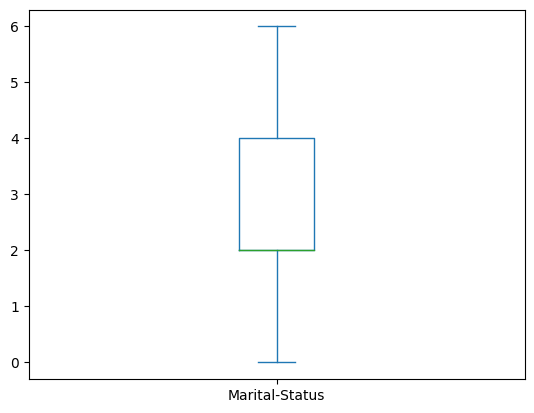

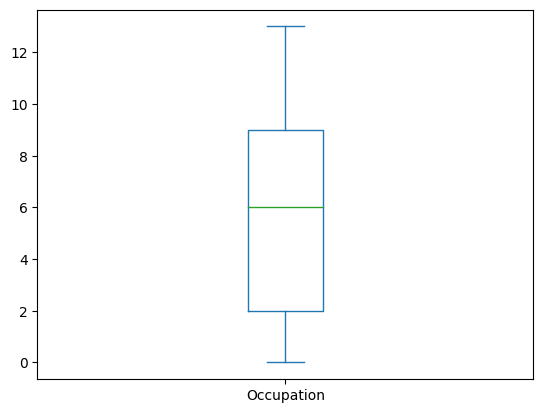

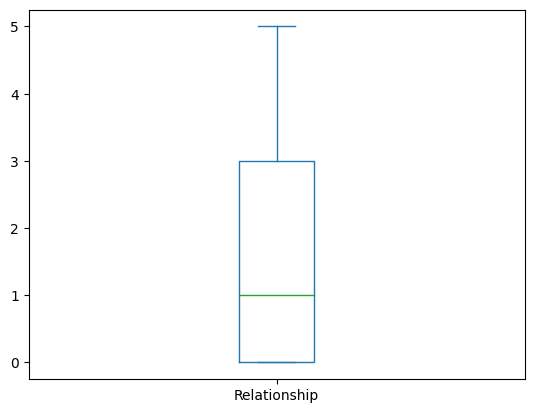

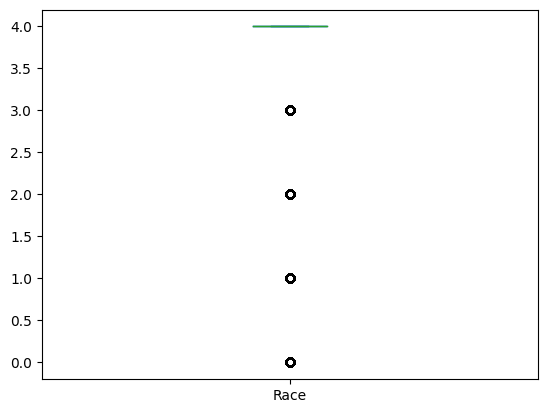

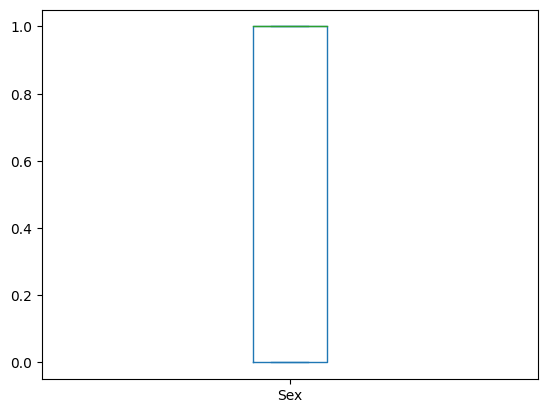

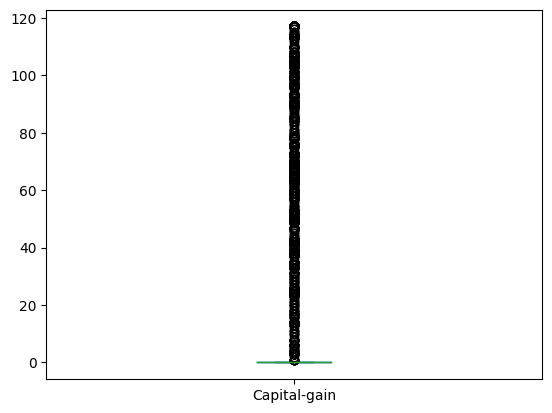

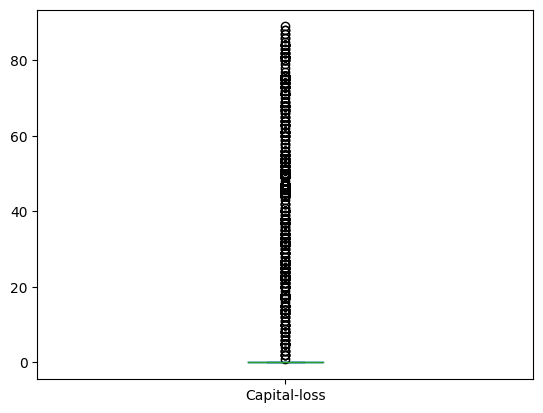

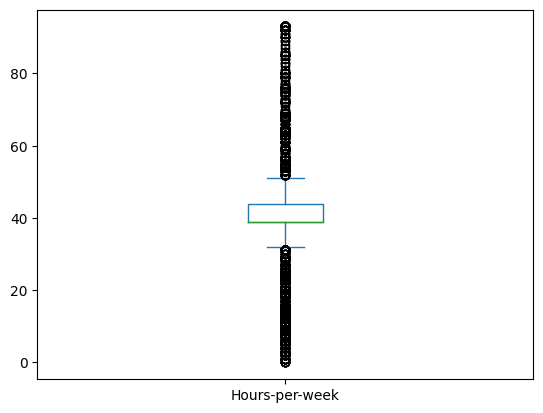

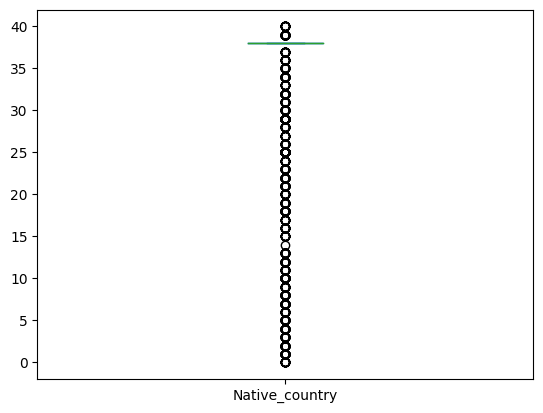

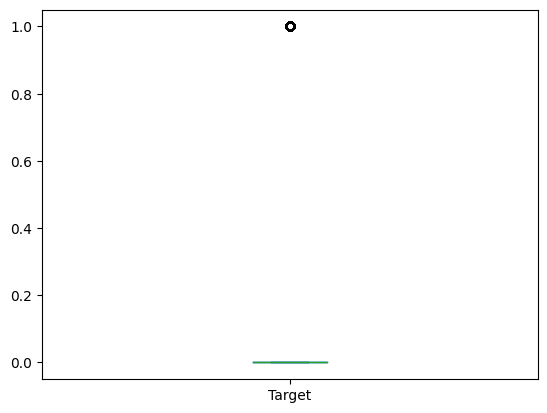

In [245]:
for column in df_dropped.columns:
  df_dropped[column].plot(kind='box')
  plt.show()

0 cannot be removed from age </br>
workclass is biased towards private employees (verify with boxplot and feature engineering matrix) </br>
normalize the values in original df for final_weight </br>
Most of the people are Highschool grads or have a bachleors degree </br>
Lot of divorceses in data

In [246]:
X = df_dropped.drop(['Target'],axis=1)
y = df_dropped['Target']

In [247]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,shuffle=True)

testing with 1 neighbour, the accuracy was unrealistic

In [248]:
from sklearn.neighbors import KNeighborsClassifier
for i in [3,5,7,9]:
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X,y)
  y_preds = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_preds)
  print("Accuracy: ",accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_preds))

Accuracy:  0.8609200165768752
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      8996
           1       0.77      0.65      0.70      3069

    accuracy                           0.86     12065
   macro avg       0.83      0.79      0.81     12065
weighted avg       0.86      0.86      0.86     12065

Accuracy:  0.8319933692498964
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      8996
           1       0.74      0.53      0.62      3069

    accuracy                           0.83     12065
   macro avg       0.80      0.73      0.75     12065
weighted avg       0.82      0.83      0.82     12065

Accuracy:  0.8164939908827186
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      8996
           1       0.72      0.45      0.56      3069

    accuracy           

In [249]:
from sklearn.metrics import classification_report